# Preprocesado e ingeniería de características

## Procesado de los datos

El conjunto de datos sobre reconocimiento de vinos está incluido en *Scikit-learn*, se obtiene usando la función `load_wine` incluida en la librería `sklearn.datasets`. Este conjunto de datos contiene 178 ejemplos de distintas variedades de vino, con 13 características y tres clasificaciones posibles.

In [1]:
from sklearn.datasets import load_wine

wine = load_wine()

Este conjunto de datos es un diccionario con varios campos:
* `data`: Es el conjunto de datos, se trata de un array en el que cada componente es un array con las características de cada instancia.
* `target`: Es el conjunto de valores de clasificación para cada instancia. Es un array del mismo tamaño que `data`, en el que se indica el valor de clasificación de cada instancia, en el mismo orden en que éstas se encuentran en el array `data`.
* `DESCR`: Es una descripción del conjunto de datos.
* `target_names`: Es un array con los nombres de cada valor de clasificación.
* `feature_names`: Es un array con los nombres de cada característica.

Almacenamos los datos en las variables `X_data`, `y_data`, `X_names` e `y_names`.

In [2]:
X_data, y_data, X_names, y_names = wine.data, wine.target, wine.feature_names, wine.target_names

## Contenido del ejercicio

El ejercicio consiste en aplicar distintas estrategias de reducción de dimensionalidad y comparar los resultados
* Implementar una función para realizar la eliminación recursiva de características tal y como se ha explicado en teoría, para reducir el número de características hasta un valor dado. (No es igual al método implementado por la clase RFE incluido en *Scikit-learn*)
* Realizar selección de características basada en modelos para reducir el número de características del conjunto de datos. Investigar los parámetros de la clase SelectFromModel para reducir el número de características hasta un valor dado.
* Estudiar las características del conjunto de datos mediante análisis de componentes principales. Reducir el número de características hasta un valor dado.

El **desarrollo tiene que estar razonado**, indicando en cada apartado qué se está haciendo, **demostrando así el conocimiento adquirido en este módulo**. ¿Qué conclusiones puedes sacar sobre las características de este conjunto de datos?

## Ejercicio

**Autor**: Sergio Rodríguez Calvo

### Ejercicio 1

In [3]:
print(wine["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

Vamos a usar LogisticRegression al tratarse de un problema de clasificación multiclase, especificando `multinomial` y con solver `lbfgs`.

In [4]:
import numpy as np
from sklearn.linear_model import LogisticRegression

def eliminacion_recursiva(X, y, X_names, n_target=1, verbose=0, random_state=0):
    stop = False # To be able to stop the loop once there is no improve
    best_score = LogisticRegression(random_state=random_state, multi_class='multinomial', solver='lbfgs').fit(X, y).score(X,y)
    X_data = np.copy(X)
    names = np.copy(X_names)

    while not stop and X_data.shape[1] > n_target:
        best_i = -1

        for i in range(X_data.shape[1]):
            X_tmp = np.concatenate((X_data[:,:i],X_data[:,i+1:]), axis=1)
            tmp_score = LogisticRegression(random_state=random_state, multi_class='multinomial', solver='lbfgs').fit(X_tmp, y).score(X_tmp, y)

            if tmp_score > best_score:
                best_score = tmp_score
                best_i = i
            
        if best_i >= 0:
            names = np.copy(np.concatenate((names[:best_i],names[best_i+1:]), axis=None))
            X_data = np.concatenate((X_data[:,:best_i],X_data[:,best_i+1:]), axis=1)
        else:
            stop = True
    
    if verbose:
        print("Dataset shape result: ", X_data.shape)
        print("Remaining names: ", names)
    
    return (X_data, names)


X1_data, X1_names = eliminacion_recursiva(X_data, y_data, X_names)

print("Características restantes: ", X1_names)
print("Numero de características eliminadas: ", len(X_names) - len(X1_names))
print("Forma del dataset resultante: ", X1_data.shape)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Características restantes:  ['ash' 'alcalinity_of_ash' 'magnesium' 'total_phenols' 'flavanoids'
 'nonflavanoid_phenols' 'proanthocyanins' 'color_intensity' 'hue'
 'od280/od315_of_diluted_wines' 'proline']
Numero de características eliminadas:  2
Forma del dataset resultante:  (178, 11)


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Se han eliminado dos características.

### Ejercicio 2

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

mlr = LogisticRegression(random_state=74, multi_class='multinomial', solver='lbfgs')
smf = SelectFromModel(mlr, max_features=10)
smf.fit(X_data, y_data)
X1_data = smf.transform(X_data)

score = LogisticRegression(random_state=74, multi_class='multinomial', solver='lbfgs').fit(X_data, y_data).score(X_data,y_data)
smf_score = LogisticRegression(random_state=74, multi_class='multinomial', solver='lbfgs').fit(X1_data, y_data).score(X1_data,y_data)

print('La forma del conjunto inicial es: {}'.format(X_data.shape))
print('La forma del conjunto tras eliminar las características es: {}'.format(X1_data.shape))
print('El rendimiento sobre el conjunto inicial es: {:.3f}'.format(score))
print('El rendimiento sobre el conjunto tras la selección de características es: {:.3f}'.format(smf_score))

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

La forma del conjunto inicial es: (178, 13)
La forma del conjunto tras eliminar las características es: (178, 5)
El rendimiento sobre el conjunto inicial es: 0.966
El rendimiento sobre el conjunto tras la selección de características es: 0.921


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
smf = SelectFromModel(mlr, max_features=5)
smf.fit(X_data, y_data)
X1_data = smf.transform(X_data)

score = LogisticRegression(random_state=74, multi_class='multinomial', solver='lbfgs').fit(X_data, y_data).score(X_data,y_data)
smf_score = LogisticRegression(random_state=74, multi_class='multinomial', solver='lbfgs').fit(X1_data, y_data).score(X1_data,y_data)

print('La forma del conjunto inicial es: {}'.format(X_data.shape))
print('La forma del conjunto tras eliminar las características es: {}'.format(X1_data.shape))
print('El rendimiento sobre el conjunto inicial es: {:.3f}'.format(score))
print('El rendimiento sobre el conjunto tras la selección de características es: {:.3f}'.format(smf_score))

La forma del conjunto inicial es: (178, 13)
La forma del conjunto tras eliminar las características es: (178, 5)
El rendimiento sobre el conjunto inicial es: 0.966
El rendimiento sobre el conjunto tras la selección de características es: 0.921


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [7]:
smf = SelectFromModel(mlr, max_features=4)
smf.fit(X_data, y_data)
X1_data = smf.transform(X_data)

score = LogisticRegression(random_state=74, multi_class='multinomial', solver='lbfgs').fit(X_data, y_data).score(X_data,y_data)
smf_score = LogisticRegression(random_state=74, multi_class='multinomial', solver='lbfgs').fit(X1_data, y_data).score(X1_data,y_data)

print('La forma del conjunto inicial es: {}'.format(X_data.shape))
print('La forma del conjunto tras eliminar las características es: {}'.format(X1_data.shape))
print('El rendimiento sobre el conjunto inicial es: {:.3f}'.format(score))
print('El rendimiento sobre el conjunto tras la selección de características es: {:.3f}'.format(smf_score))

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


La forma del conjunto inicial es: (178, 13)
La forma del conjunto tras eliminar las características es: (178, 4)
El rendimiento sobre el conjunto inicial es: 0.966
El rendimiento sobre el conjunto tras la selección de características es: 0.927


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
smf = SelectFromModel(mlr, max_features=3)
smf.fit(X_data, y_data)
X1_data = smf.transform(X_data)

score = LogisticRegression(random_state=74, multi_class='multinomial', solver='lbfgs').fit(X_data, y_data).score(X_data,y_data)
smf_score = LogisticRegression(random_state=74, multi_class='multinomial', solver='lbfgs').fit(X1_data, y_data).score(X1_data,y_data)

print('La forma del conjunto inicial es: {}'.format(X_data.shape))
print('La forma del conjunto tras eliminar las características es: {}'.format(X1_data.shape))
print('El rendimiento sobre el conjunto inicial es: {:.3f}'.format(score))
print('El rendimiento sobre el conjunto tras la selección de características es: {:.3f}'.format(smf_score))

La forma del conjunto inicial es: (178, 13)
La forma del conjunto tras eliminar las características es: (178, 3)
El rendimiento sobre el conjunto inicial es: 0.966
El rendimiento sobre el conjunto tras la selección de características es: 0.904


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Tras probar con varias selecciones de características, parece que 4 es el número que nos interesa, porque obtenemos un resultado aceptable con sólo 4 características. Mejorando a sólo 3 y 5 características.

### Ejercicio 3

En primer lugar, vamos a cargar los datos en un _dataframe_ de pandas, para posteriormente hacer una representación gráfica enfrentando las propiedades dos a dos y ver visualmente cuales son las propiedades con las que podemos separar más facilmente las tres clases de vinos.

In [9]:
import pandas as pd


df = pd.concat([pd.DataFrame(wine.data, columns = wine.feature_names), 
                  pd.DataFrame(wine.target, columns=['target'])], axis=1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


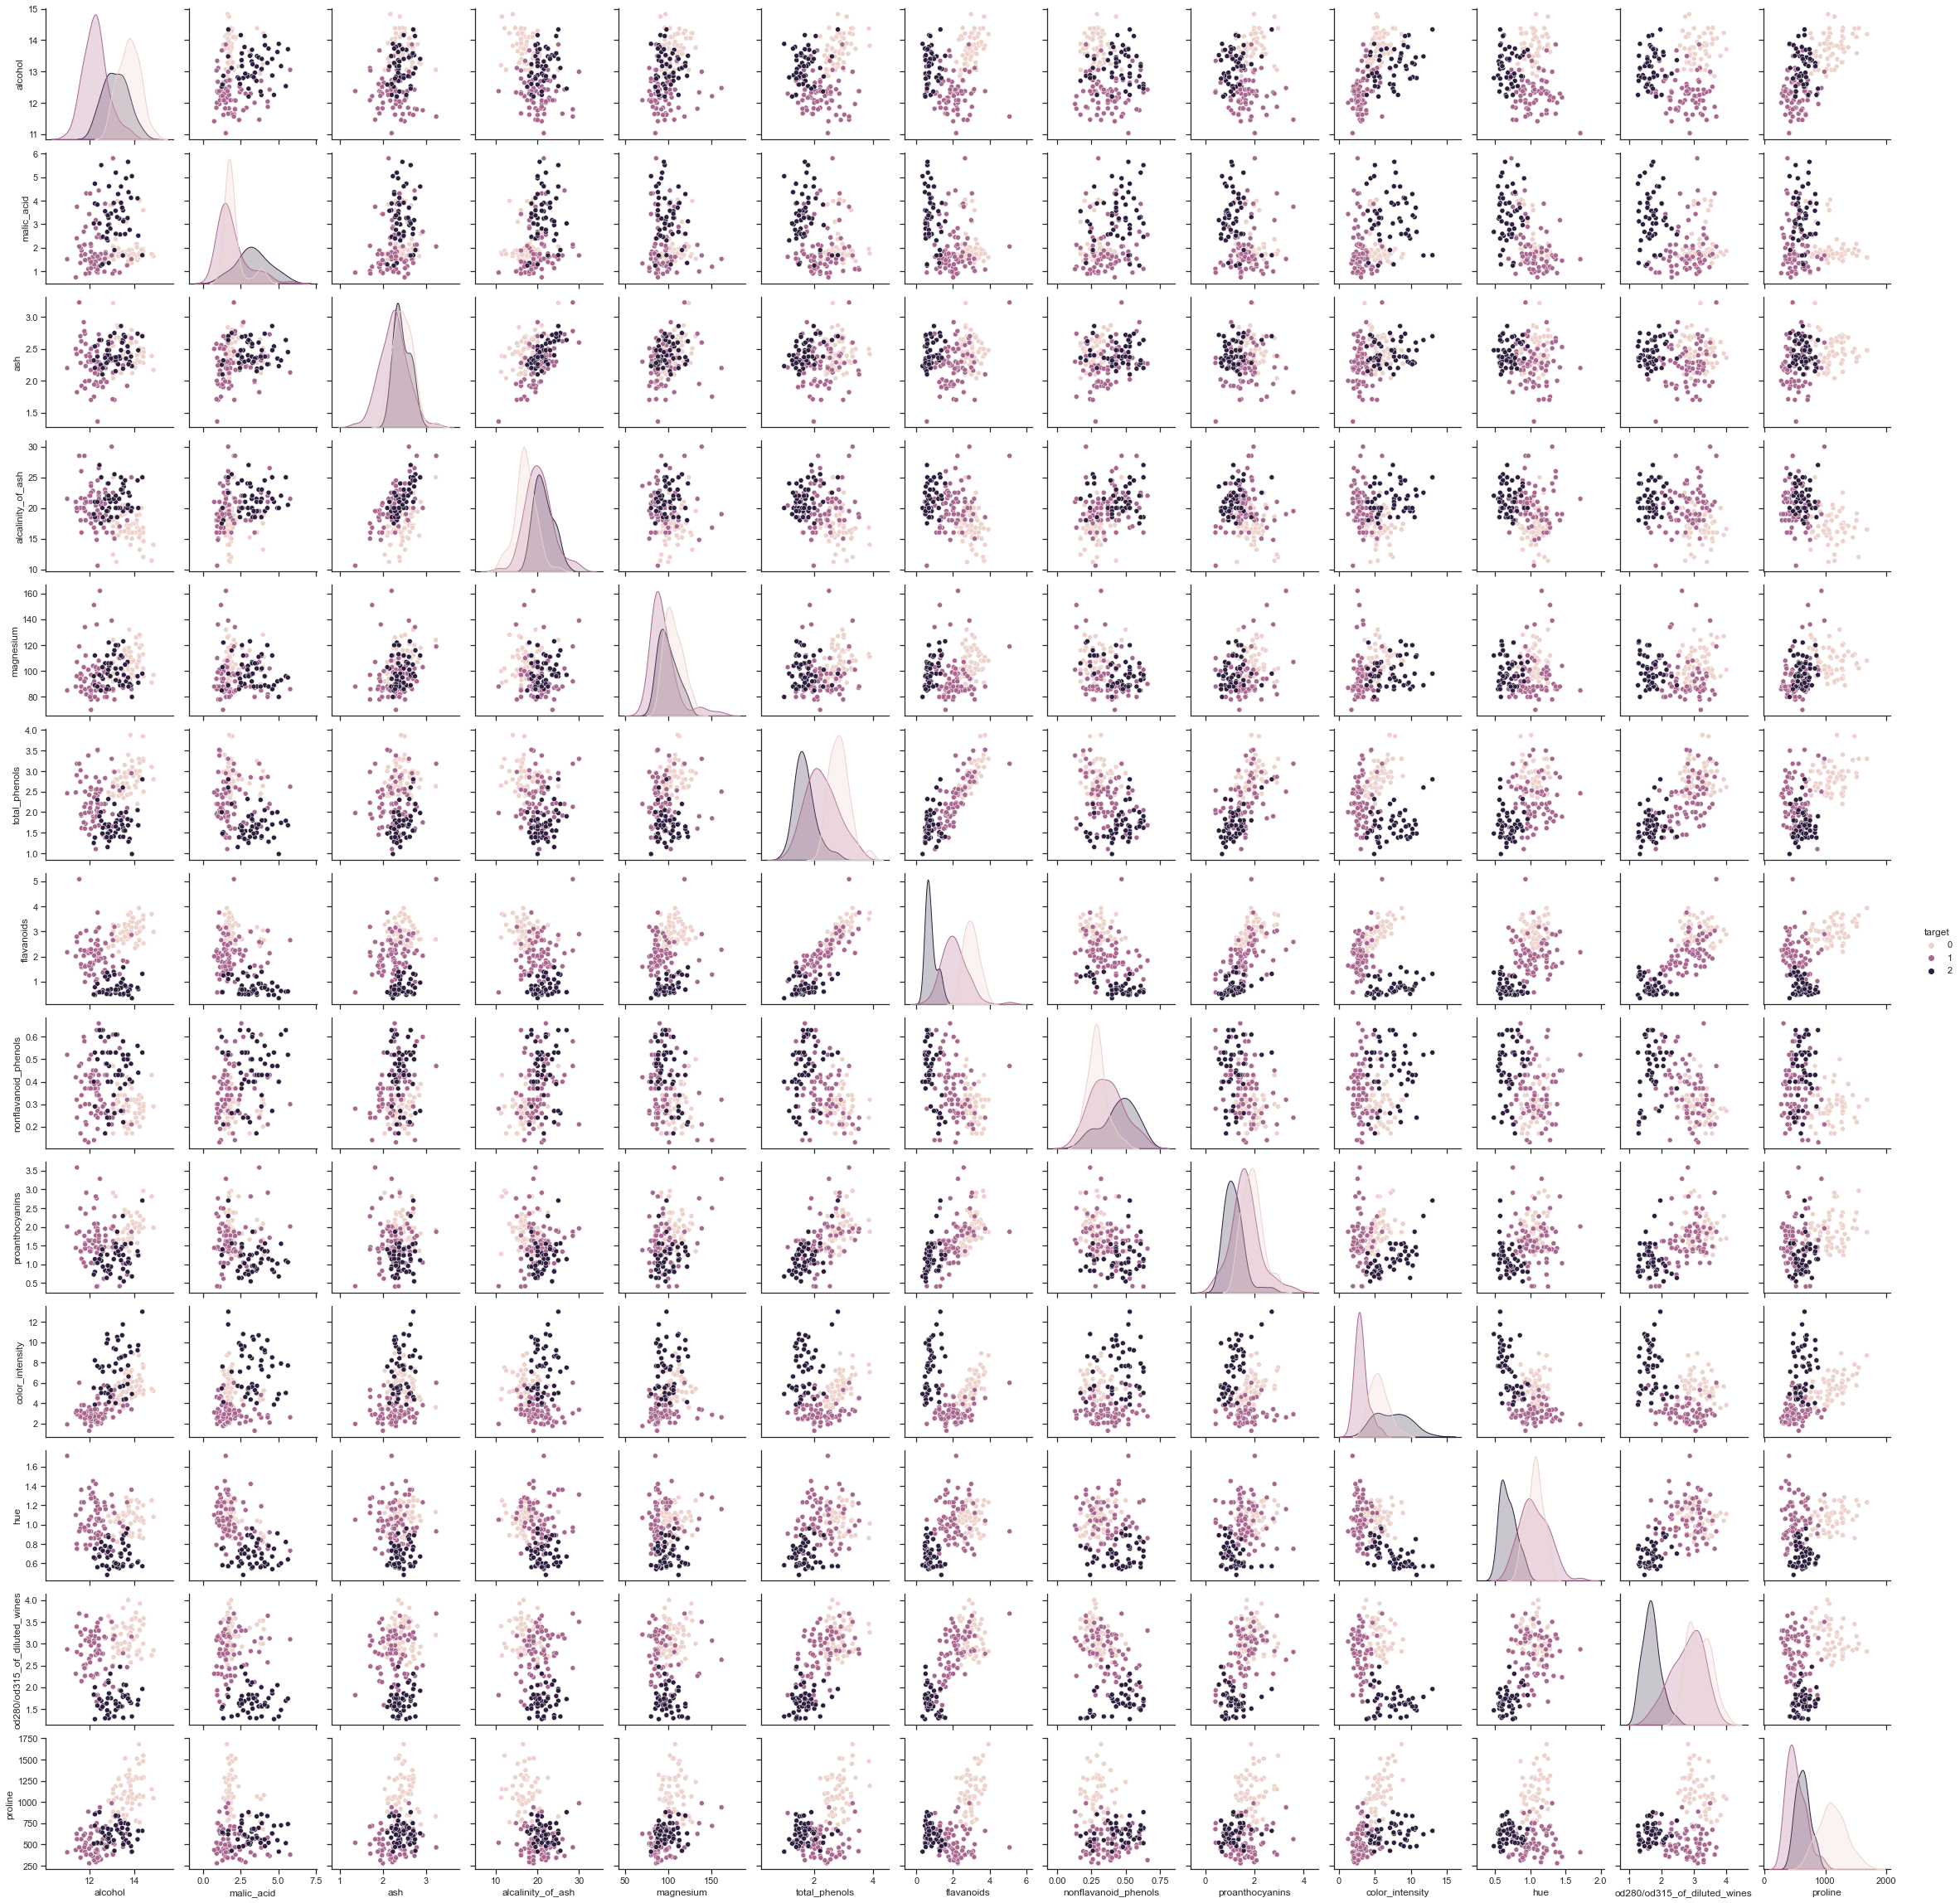

In [10]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df, hue='target')

Vemos como en la mayoría de características, es difícil separar las clases, sin embargo, la prolina es una propiedad que facilita bastante la clasificación.

Ahora, vamos a realizar una análisis de componentes principales con las 13 propiedades para ver la importancia relativa que tiene cada una de las compontes obtenidas.

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=13)
pca.fit(X_data)
X_pca = pca.transform(X_data)

pca.explained_variance_

array([9.92017895e+04, 1.72535266e+02, 9.43811370e+00, 4.99117861e+00,
       1.22884523e+00, 8.41063869e-01, 2.78973523e-01, 1.51381266e-01,
       1.12096765e-01, 7.17026032e-02, 3.75759789e-02, 2.10723661e-02,
       8.20370314e-03])

Vemos que practicamente las dos primeras componentes tienen mucha importancia y, por el contrario, el resto de componentes tienen pocas. No obstante, vamos a ir reduciendo poco a poco las componentes y comparando el valor obtenido utilizando un modelo, que entrenaremos y compararemos los resultados tras ir elminando componentes.

Vamos a comenzar, entrenado un modelo de regresión logística multinomial, ya que en este caso tenemos tres valores de clasificación y no una clasificación binaria. Para ello, indicamos la clase más apropiada (_multinomial_) y el algorimo de optimización más adecuado para este problema (_lbfgs_).

In [12]:
from sklearn.linear_model import LogisticRegression
score = LogisticRegression(random_state=74, multi_class='multinomial', solver='lbfgs').fit(X_data, y_data).score(X_data, y_data)
print('El rendimiento sobre el conjunto original es: {:.3f}'.format(score))


El rendimiento sobre el conjunto original es: 0.966


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Obtenemos un resultado de `0.966`, a continuación vamos a ver qué pasa si eliminamos 4 componentes.

In [13]:
pca = PCA(n_components=9)
pca.fit(X_data)
X_pca = pca.transform(X_data)
pca_score = LogisticRegression(random_state=74, multi_class='multinomial', solver='lbfgs').fit(X_pca, y_data).score(X_pca,y_data)
print('El rendimiento sobre el conjunto es: {:.3f}'.format(score))


El rendimiento sobre el conjunto es: 0.966


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Vemos que el valor sigue siendo el mismo, por lo que vamos a continuar los experimentos hasta quedarnos con 2 componentes solamente.

In [14]:
pca = PCA(n_components=5)
pca.fit(X_data)
X_pca = pca.transform(X_data)
pca_score = LogisticRegression(random_state=74, multi_class='multinomial', solver='lbfgs').fit(X_pca, y_data).score(X_pca,y_data)
print('El rendimiento sobre el conjunto es: {:.3f}'.format(score))

El rendimiento sobre el conjunto es: 0.966


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
pca = PCA(n_components=2)
pca.fit(X_data)
X_pca = pca.transform(X_data)
pca_score = LogisticRegression(random_state=74, multi_class='multinomial', solver='lbfgs').fit(X_pca, y_data).score(X_pca,y_data)
print('El rendimiento sobre el conjunto es: {:.3f}'.format(score))

El rendimiento sobre el conjunto es: 0.966


In [16]:
pca = PCA(n_components=1)
pca.fit(X_data)
X_pca = pca.transform(X_data)
pca_score = LogisticRegression(random_state=74, multi_class='multinomial', solver='lbfgs').fit(X_pca, y_data).score(X_pca,y_data)
print('El rendimiento sobre el conjunto es: {:.3f}'.format(score))

El rendimiento sobre el conjunto es: 0.966


Vemos que el resultado ha sido el mismo hasta eliminar todas las componentes menos 1. Y es que, como hemos visto en la respresentación conjunta, con la prolina es prácticamente suficiente.